In [1]:
import numpy as np
import scipy.sparse as sps
from sklearn.preprocessing import StandardScaler
from pyglmnet import GLM

# create an instance of the GLM class
glm = GLM(distr='poisson')

n_samples, n_features = 10000, 100

from matplotlib.pyplot import * # plotting functions
%matplotlib inline

In [2]:
# sample random coefficients
beta0 = np.random.normal(0.0, 1.0, 1)
beta = sps.rand(n_features, 1, 0.1)
beta = np.array(beta.todense())

In [3]:
# simulate training data
X_train = np.random.normal(0.0, 1.0, [n_samples, n_features])
y_train = glm.simulate(beta0, beta, X_train)

In [4]:
# simulate testing data
X_test = np.random.normal(0.0, 1.0, [n_samples, n_features])
y_test = glm.simulate(beta0, beta, X_test)

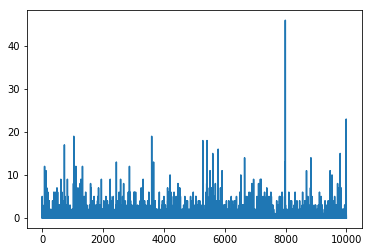

In [5]:
plot(y_train)

In [6]:
%%time
# fit the model on the training data
scaler = StandardScaler().fit(X_train)
glm.fit(scaler.transform(X_train), y_train)

CPU times: user 4.69 s, sys: 17.5 s, total: 22.2 s
Wall time: 4.57 s


In [7]:
# predict using fitted model on the test data
yhat_test = glm.predict(scaler.transform(X_test))

In [8]:
# score the model
glm.score(X_test, y_test)

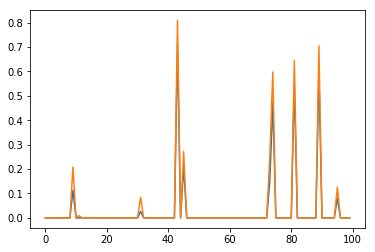

In [21]:
plot(glm.fit_[9]['beta'])
plot(beta)